[58.84117550100547, 65.50509345808399, 42.1813806083092, 112.15251915763356, 115.48447813617281, 95.49272426493728, 45.51333958684845, 118.81643711471206, 62.17313447954473, 192.11953464257567, 102.15664222201579]
[ 31.9  32.1  55.6 133.3 194.5 137.9  87.4 209.8  95.5 244.6 187.5]
The R2 score of the model is:  -0.6549316032641181
The MSE score of the model is:  2881.0637446907617
Slope: 3.413823560066367
Intercept: 19.99448575911481


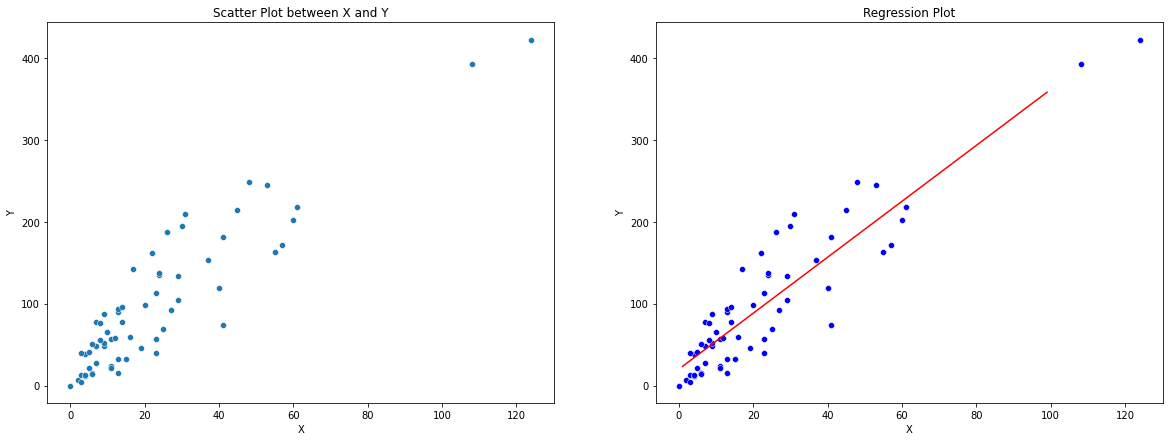

In [56]:
#Hard Coding
# Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

# Read Data
df = pd.read_csv('/content/Insurance.csv')
x = df['X'].values
y = df['Y'].values

# mean
def get_mean(arr):
    return np.sum(arr)/len(arr)

# variance
def get_variance(arr, mean):
    return np.sum((arr-mean)**2)

# covariance
def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)

# find coeff
def get_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    c = y_mean - x_mean*m
    return m, c

# Regression Function
def linear_regression(x_train, y_train, x_test, y_test):
    prediction = []
    m, c = get_coefficients(x_train, y_train)
    for x in x_test:
        y = m*x + c
        prediction.append(y)
        
    r2 = r2_score(prediction, y_test)
    mse = mean_squared_error(prediction, y_test)
    print(prediction)
    print(y_test)
    print("The R2 score of the model is: ", r2)
    print("The MSE score of the model is: ", mse)
    return prediction

# There are 63 sample out of which 52 are for training and 11 are for testing
linear_regression(x[:52], y[:52], x[52:], y[52:])

# Visualize
def plot_reg_line(x, y):
    prediction = []
    m, c = get_coefficients(x, y)
    print('Slope:', m)
    print('Intercept:', c)
    for x0 in range(1,100):
        yhat = m*x0 + c
        prediction.append(yhat)
    
    fig = plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.scatterplot(x=x, y=y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot between X and Y')
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=x, y=y, color = 'blue')
    sns.lineplot(x = [i for i in range(1,100)], y = prediction, color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regression Plot')
    plt.show()
    
plot_reg_line(x, y)

[108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16  13  60  41  37  55  41  11  27   8   3  17  13  13  15
   8  29  30  24   9  31  14  53  26]
The R2 score of the model is:  -0.6549316032641181
The MSE score of the model is:  2881.0637446907613


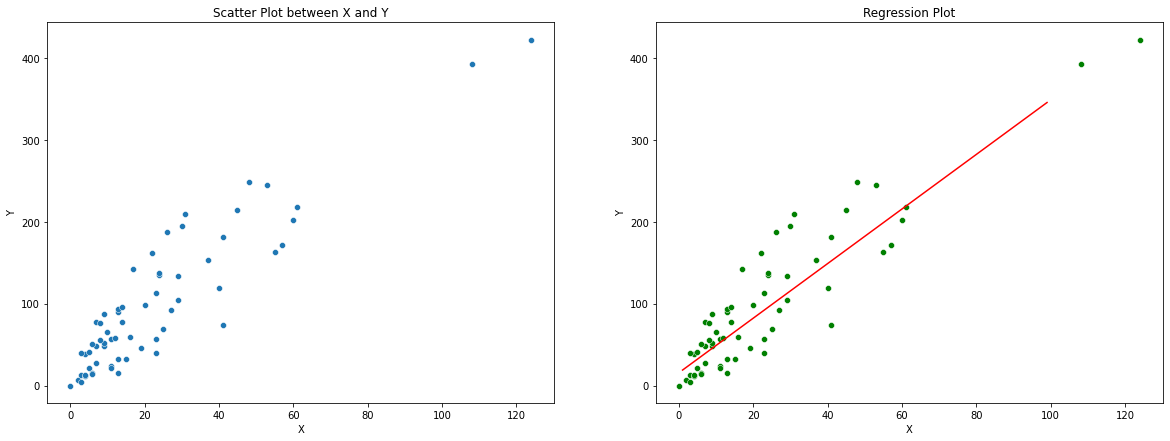

In [57]:
#Using Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/Insurance.csv')
x = df['X'].values
y = df['Y'].values
print(x)
reg = LinearRegression()
reg.fit(x[:52].reshape(-1, 1), y[:52])
prediction = reg.predict(x[52:].reshape(-1, 1))
r2 = r2_score(prediction, y[52:])
mse = mean_squared_error(prediction, y[52:])
print("The R2 score of the model is: ", r2)
print("The MSE score of the model is: ", mse)

prediction = reg.predict(np.array([i for i in range(1, 100)]).reshape(-1, 1))

fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=x, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot between X and Y')

plt.subplot(1,2,2)
sns.scatterplot(x=x, y=y, color = 'green')
sns.lineplot(x = [i for i in range(1, 100)], y = prediction, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Plot')
plt.show()

#Gradient Descent:
https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/

Predicted values  [ 40594.69 123305.18  65031.88]
Real values       [ 37731 122391  57081]
Trained W         9398.92
Trained b         26496.31


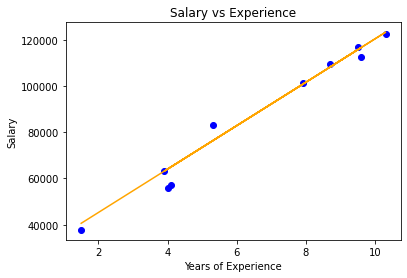

In [52]:
# Importing libraries
  
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Linear Regression
  
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate  
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )    
        self.b = 0 
        self.X = X
        self.Y = Y
          
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b
     
  
# driver code
  
def main() :
      
    # Importing dataset
      
    df = pd.read_csv( "/content/salary_data.csv" )
    X = df.iloc[:,:-1].values
    Y = df.iloc[:,1].values
      
    # Splitting dataset into train and test set
  
    X_train, X_test, Y_train, Y_test = train_test_split( 
      X, Y, test_size = 1/3, random_state = 0 )
      
    # Model training
      
    model = LinearRegression( iterations = 1000, learning_rate = 0.01 )
    model.fit( X_train, Y_train )
      
    # Prediction on test set
  
    Y_pred = model.predict( X_test )
      
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) ) 
      
    print( "Real values      ", Y_test[:3] )
      
    print( "Trained W        ", round( model.W[0], 2 ) )
      
    print( "Trained b        ", round( model.b, 2 ) )
      
    # Visualization on test set 
      
    plt.scatter( X_test, Y_test, color = 'blue' )
      
    plt.plot( X_test, Y_pred, color = 'orange' )
    plt.title( 'Salary vs Experience' )
    plt.xlabel( 'Years of Experience' )
    plt.ylabel( 'Salary' ) 
    plt.show()
     
if __name__ == "__main__" : 
      
    main()